<a href="https://colab.research.google.com/github/asb20/Pilot-Plant-Data-Parsing/blob/master/PolynomialRegressionTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [41]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()    #create an object for the llinear regression
lin_reg.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [51]:
from sklearn.preprocessing import PolynomialFeatures   #polynomial features is the name of the class for poly regression
poly_reg = PolynomialFeatures(degree = 4)   #degree of polynomial is the argument of this object (change degree and retrain every time to test different fits)
poly_reg.fit_transform(X)  #converts matrix of features to matrix of polynomial features with degree n
x_poly = poly_reg.fit_transform(X)   #save transformed features in new matrix

lin_reg2 = LinearRegression()   #creating new linear regression object to fit polynomial features

lin_reg2.fit(x_poly,y) #train linear regression on polynomial features -- this amounts to "polynomail" regression

print(x_poly)


[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


## Visualising the Linear Regression results

Text(0, 0.5, 'Salary')

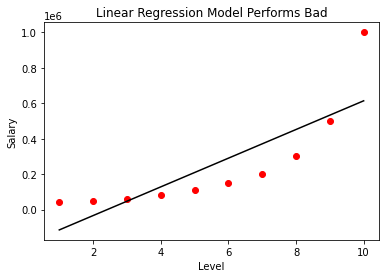

In [52]:
plt.scatter(X,y, color = 'red')   #original dataset
plt.plot(X, lin_reg.predict(X), color = 'black')  #visualizing first linear regression done with original data
plt.title('Linear Regression Model Performs Bad')
plt.xlabel('Level')
plt.ylabel('Salary')



## Visualising the Polynomial Regression results

Text(0, 0.5, 'Salary')

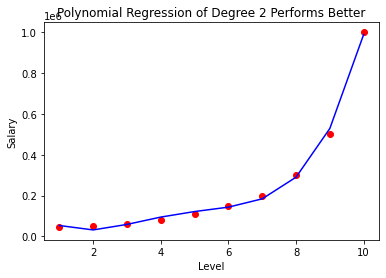

In [53]:
plt.scatter(X,y, color = 'red')   #original dataset
plt.plot(X, lin_reg2.predict(x_poly), color = 'blue')
plt.title('Polynomial Regression of Degree 4 Performs Better')   
plt.xlabel('Level')
plt.ylabel('Salary')



## Predicting a new result with Linear Regression

In [56]:
lin_reg.predict([[6.5]])   #input for new prediction should be given as an array, array of 2D even if the feature only is a single value

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [61]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]]))    #need to still input the polynomial features


#predicted salary using polynomial regression is more believable

array([158862.45265155])